In [2]:
import wbdata
import pandas as pd
import pandas_profiling
import datetime
import quandl
%config IPCompleter.greedy=True
import pandas_datareader
import Qgrid



# Monthly data - currency crisis
    

In [3]:

### Inspecting world bank  Apis

wbdata.get_source()

1 	Doing Business
2 	World Development Indicators
3 	Worldwide Governance Indicators
5 	Subnational Malnutrition Database
6 	International Debt Statistics
11	Africa Development Indicators
12	Education Statistics
13	Enterprise Surveys
14	Gender Statistics
15	Global Economic Monitor
16	Health Nutrition and Population Statistics
18	IDA Results Measurement System
19	Millennium Development Goals
20	Quarterly Public Sector Debt
22	Quarterly External Debt Statistics SDDS
23	Quarterly External Debt Statistics GDDS
24	Poverty and Equity
25	Jobs
27	Global Economic Prospects
28	Global Financial Inclusion
29	The Atlas of Social Protection: Indicators of Resilience and Equity
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
31	Country Policy and Institutional Assessment
32	Global Financial Development
33	G20 Financial Inclusion Indicators
34	Global Partnership for Education
35	Sustainable Energy for All
36	Statistical Capacity Indicators
37	LAC Equity Lab
38	Subnational Poverty
39

In [5]:
### fecthing country names from IMF database to get all ISO codes
countrycodes = pd.read_csv('coucodes.csv', delimiter = ';', encoding = "ISO-8859-1")
countrycodes = countrycodes[["IMF Name", "ISO Code", "ISO2 Code"]]
countrycodes.reset_index(level=0, inplace=True)
countrycodes = countrycodes.rename(columns={'IMF Name': 'country'})


In [106]:
countrycodes


,index,country,ISO Code,ISO2 Code
0,0,Afghanistan,AFG,AF
1,1,Albania,ALB,AL
2,2,Algeria,DZA,DZ
3,3,Angola,AGO,AO
4,4,Argentina,ARG,AR
5,5,Armenia,ARM,AM
6,6,Australia,AUS,AU
7,7,Austria,AUT,AT
8,8,Azerbaijan,AZE,AZ
9,9,The Bahamas,BHS,BH


In [6]:
#downloading data from worldbank

from pandas_datareader import wb

worldbank_data = pandas_datareader.wb.download(indicator = ["NEER", "REER", "TOT", "TOTRESV","UNEMPSA_", "RETSALESSA",  "IPTOTSAKD", "DXGSRMRCHSAKD","DSTKMKTXD", "DMGSRMRCHSAKD","CPTOTSAXN"], country = countrycodes["ISO Code"], start = 2010, end = 2020, freq = "M")
worldbank_data2 = pandas_datareader.wb.download(indicator = ["NEER", "REER", "TOT", "TOTRESV","UNEMPSA_", "RETSALESSA",  "IPTOTSAKD", "DXGSRMRCHSAKD","DSTKMKTXD", "DMGSRMRCHSAKD","CPTOTSAXN"], country = countrycodes["ISO Code"], start = 1999, end = 2009, freq = "M")
worldbank_data3 = pandas_datareader.wb.download(indicator = ["NEER", "REER", "TOT", "TOTRESV","UNEMPSA_", "RETSALESSA",  "IPTOTSAKD", "DXGSRMRCHSAKD","DSTKMKTXD", "DMGSRMRCHSAKD","CPTOTSAXN"], country = countrycodes["ISO Code"], start = 1990, end = 1998, freq = "M")

worldbank_data = pd.concat([worldbank_data, worldbank_data2])
worldbank_data = pd.concat([worldbank_data, worldbank_data3])

worldbank_data.reset_index(inplace=True)


In [7]:
worldbank_data_conc = pd.merge(worldbank_data, countrycodes, on="country")



In [8]:
#Get missing data per country. This is the basic data that will be used, so we will define a arbitrary maximum threshold of missing values.

def count_missing(frame):
    return (frame.shape[0] * frame.shape[1]) - frame.count().sum()

nan_by_country = worldbank_data_conc.groupby("country").apply(count_missing)

#Threshold
selected_countries = nan_by_country[nan_by_country < 1500]
selected_countries

country
Argentina          1073
Australia           787
Austria            1058
Belgium             166
Brazil              349
Bulgaria           1359
Canada              221
Chile               671
China              1005
Colombia           1140
Croatia            1379
Czech Republic      492
Denmark             365
Estonia            1444
Finland             250
France              228
Germany             154
Greece              762
Hungary             515
India              1326
Indonesia          1052
Ireland             216
Israel              791
Italy               470
Japan                62
Jordan             1282
Latvia             1238
Luxembourg         1274
Malaysia           1103
Mexico              232
Netherlands         414
Norway              459
Pakistan           1302
Peru                675
Philippines         472
Poland              542
Portugal           1029
Saudi Arabia       1268
Singapore            76
Slovak Republic     983
Slovenia           1477
South Af

In [9]:
#Subsetting the original data based on the definition above
selected_worldbank_data = worldbank_data_conc[worldbank_data_conc["country"].isin(selected_countries.index)]


In [10]:
# Example: loading IMF data into pandas
#Monthly data
# Import libraries
import requests
import pandas as pd

#FOr now we are removing Ireland because an aparent error of the api
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/IFS/M.AR+AU+AT+BE+BR+BG+CA+CL+CH+CO+HR+CZ+DK+EE+FI+FR+DE+GR+HK+HU+IN+ID+IS+IT+JP+JO+KR+LV+LU+MY+MX+NL+NO+PK+PE+PH+PL+PT+NA+RU+SA+SG+SK+SL+ZA+ES+SE+CH+TW+TH+TN+TR+UG+GB+US+VE.FIGB_PA+LWR_IX+RAFAGOLDV_OZT+RAXG_USD+FASF_XDC+FASMB_XDC+FASL_XDC+FMB_XDC.?startPeriod=1990&endPeriod=2020'

# Get data from the above URL using the requests package
data = requests.get(url).json()



### Needed variables

M2 Multiplier
Domestic credit / gdp
domestic real interest rate
lending-depoist rate ratio
"excess" M1 balances
M2/reserves
bank deposits
exports
imports
terms of trade
real exchange rate
fx reserves
real interest rate differential 
output
stock returns
short-term foreign debt
foreign debt
world real interest rate
credit gap
equity price gap
output gap
real effective exchange rate
current account % gdp
commodity terms of trade index




In [12]:
#### stacking IMF data and creating a dataframe
stack = []
for x in range(293):
    data2 = pd.DataFrame(data['CompactData']['DataSet']['Series'][x]["Obs"])[["@OBS_VALUE", "@TIME_PERIOD"]]
    data2["country"] = data['CompactData']['DataSet']['Series'][x]["@REF_AREA"]
    data2["indicator"] = data['CompactData']['DataSet']['Series'][x]["@INDICATOR"]
    stack.append(data2)
stack = pd.concat(stack)

In [13]:
stack = stack.set_index(["@TIME_PERIOD", 'country', 'indicator']).unstack(level=-1)
stack.columns = stack.columns.droplevel(0)

stack.reset_index(inplace=True)
stack["@TIME_PERIOD"] = stack["@TIME_PERIOD"].str.replace("-", "M")

stack = stack.rename(columns={'@TIME_PERIOD': 'year', "country": "ISO2 Code"})
#Next: Analyze the missing data and data range

In [14]:
stack = stack.set_index(["ISO2 Code", "year"])
selected_worldbank_data = selected_worldbank_data.set_index(["ISO2 Code", "year"])

In [15]:
### Merging IMF and WB database
full_data = selected_worldbank_data.join(stack, how = "left")


In [20]:
## excel style spreadsheet inside python
import qgrid
qgrid_widget = qgrid.show_grid(full_data, show_toolbar = True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [16]:
full_data.profile_report()

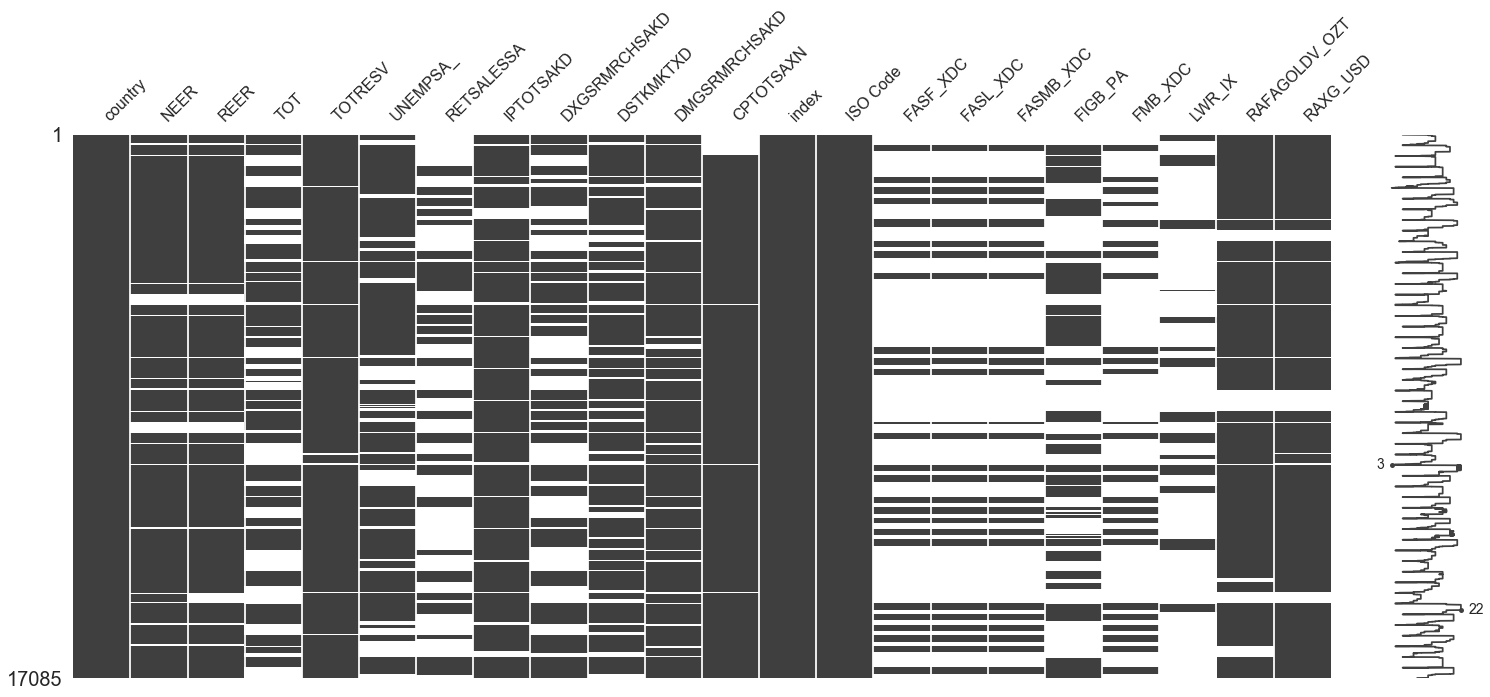

In [17]:
### missing data

import missingno as msno
msno.matrix(full_data)




# Quarterly data - Banking crisis

In [60]:
### Creating dictionary of variables 

dictionary = dict([('NYGDPMKTPKDZ','Annual GDP Growth 2010'), 
                   ('CC.EST','Control of Corruption Estimate'),
               ('RL.EST'    ,  'Rule of Law: Estimate'),
               ('RQ.EST'    ,   'Regulatory Quality: Estimate'),
               ('VA.EST'    ,   'Voice and Accountability: Estimate'),
              (' PV.EST'    ,   'Political Stability and Absence of Violence/Terrorism: Estimate'),
                  ('CORENS'       ,'Core CPI,not seas.adj'),
                ('CORESA'        ,'Core CPI,seas.adj'),
                ('CPTOTNSXN'    ,'CPI Price, nominal'),
                ('CPTOTSAXMZGY' ,'CPI Price, % y-o-y, median weighted, seas. adj.'),
                ('CPTOTSAXN'    ,'CPI Price, nominal, seas. adj.'),
                ('CPTOTSAXNZGY' ,'CPI Price, % y-o-y, nominal, seas. adj.'),
                ('DMGSRMRCHNSCD','Imports Merchandise, Customs, current US$, millions'),
                ('DMGSRMRCHNSKD','Imports Merchandise, Customs, constant US$, millions'),
                ('DMGSRMRCHNSXD','Imports Merchandise, Customs, Price, US$'),
                ('DMGSRMRCHSACD','Imports Merchandise, Customs, current US$, millions, seas. adj.'),
                ('DMGSRMRCHSAKD','Imports Merchandise, Customs, constant US$, millions, seas. adj.'),
                ('DMGSRMRCHSAXD','Imports Merchandise, Customs, Price, US$, seas. adj.'),
                ('DPANUSLCU'    ,'Official exchange rate, LCU per USD, period average'),
                ('DPANUSSPB'    ,'Exchange rate, new LCU per USD extended backward, period average'),
                ('DPANUSSPF'    ,'Exchange rate, old LCU per USD extended forward, period average'),
                ('DSTKMKTXD'    ,'Stock Markets, US$'),
                ('DSTKMKTXN'    ,'Stock Markets, LCU'),
                ('DXGSRMRCHNSCD' ,'Exports Merchandise, Customs, current US$, millions'),
                ('DXGSRMRCHNSKD' ,'Exports Merchandise, Customs, constant US$, millions'),
                ('DXGSRMRCHNSXD' ,'Exports Merchandise, Customs, Price, US$'),
                ('DXGSRMRCHSACD' , 'Exports Merchandise, Customs, current US$, millions, seas. adj.'),
                ('DXGSRMRCHSAKD' ,'Exports Merchandise, Customs, constant US$, millions, seas. adj.'),
                ('DXGSRMRCHSAXD' ,'Exports Merchandise, Customs, Price, US$, seas. adj.'),
                ('EMBIG'        ,'J.P. Morgan Emerging Markets Bond Spread (EMBI+'),
                ('EMBIGI'       ,'J.P. Morgan Emerging Markets Bond Index(EMBI+'),
                ('IMPCOV'       ,'Foreign Reserves, Months Import Cover, Goods'),
                ('IPTOTNSKD'    ,'Industrial Production, constant US$'),
                ('IPTOTSAKD'    ,'Industrial Production, constant US$, seas. adj.'),
                ('NEER'         ,'Nominal Effecive Exchange Rate'),
                ('NYGDPMKTPSACD' ,'GDP,current US$,millions,seas. adj.'),
                ('NYGDPMKTPSACN' ,'GDP,current LCU,millions,seas. adj.'),
                ('NYGDPMKTPSAKD' ,'GDP,constant 2010 US$,millions,seas. adj.'),
                ('NYGDPMKTPSAKN' ,'GDP,constant 2010 LCU,millions,seas. adj.'),
                ('REER'          ,'Real Effective Exchange Rate'),
                ('RETSALESSA'    ,'Retail Sales Volume,Index,'),
                ('TOT'           ,'Terms of Trade'),
                ('TOTRESV'       ,'Total Reserves'),
                ('UNEMPSA_'      ,'Unemployment rate,Percent')
                  ])

In [61]:
### Testing Dictionary 

dictionary['TOT']

'Terms of Trade'

## Dependent Variable and Sensitivity Analysis

In this section we are going to create different kinds of target (dependent) variables based on the research papers from the ECB.

i) Nominal Exchange Depreciation > 20%
ii) Sistemic Banking Crises


This tool is inteded to be flexible enough as to allow the inputation of different cenarios. 



In [ ]:
### building dependent variables and sensitivity analysis

# Create a new column called df.target where the value is 1
# if df.debt is greater than 90 and 0 if not
df['target'] = np.where(df['debt']>=50, '1', '0')


### create commoditiy vulnerability dummy if price has fallen and country is a commodity exporter

# nominal exchange rate depreciation

## monthly time series

### ten or twenty depreciation in a monthly 

# nominal exchange rate


### list of historical crises 


### Stationarity

This section is devoted to buid a tool for assessing stationarity in the dataframe´s time series.

In [17]:
### stationarity and non stationarity discussion 
from statsmodels.tsa.stattools import adfuller
def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        return 1
    else:
        return 0

(2.9061435259309514,
 1.0,
 12,
 224,
 {'1%': -3.459884913337196,
  '5%': -2.8745310704320794,
  '10%': -2.573693840082908},
 4051.4409350527517)

In [ ]:
### Running stationarity tests in all collumns in dataframe

from statsmodels.tsa.stattools import adfuller

stack = []
for col in dataoecd.columns:
    test = adfuller(dataoecd[col])
    stack.append(test)


In [ ]:
### testing
stack

In [ ]:
### build indicators


In [85]:
### Preparing machine learning pipeline 

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


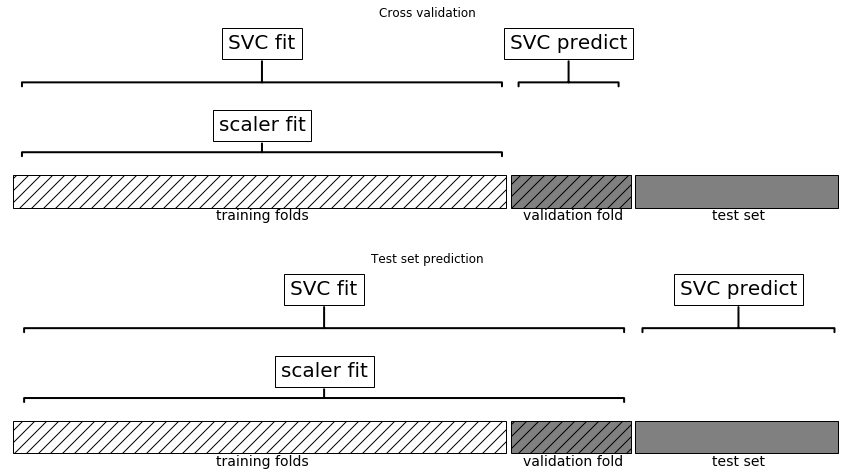

In [89]:
#### Describing what a ML pipeline looks like.

import mglearn 
mglearn.plots.plot_proper_processing()

In [102]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# load and split the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# compute minimum and maximum on the training data
scaler = MinMaxScaler().fit(X_train)

In [103]:
# rescale the training data
X_train_scaled = scaler.transform(X_train)
svm = SVC()
# learn an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scale the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.95


C:\Users\leomf\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [104]:
from sklearn.model_selection import GridSearchCV
# for illustration purposes only, don't use this code!
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.98
Best set score: 0.97
Best parameters:  {'C': 1, 'gamma': 1}


In [105]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [106]:
pipe.fit(X_train, y_train)

C:\Users\leomf\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [107]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [108]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


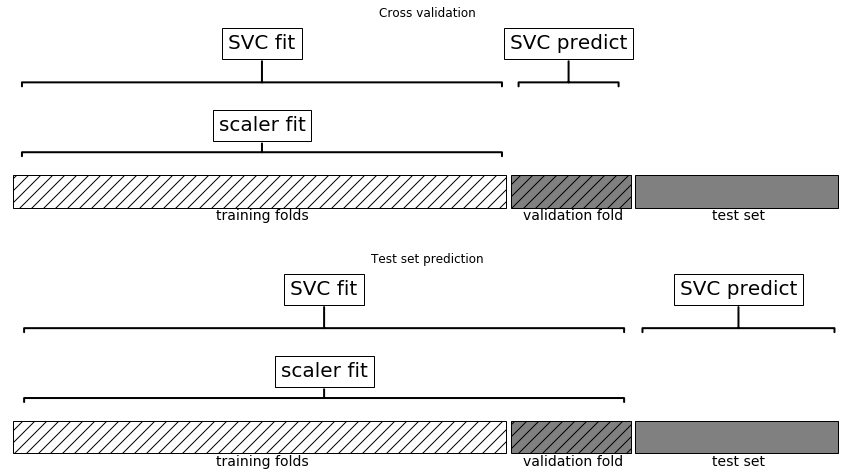

In [109]:
mglearn.plots.plot_proper_processing()